Data Gathering Lab 2
--------------------

Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
from crawler import Crawler
from crawler_state import CrawlerState
from crawler_abst_api import CrawlerAbstractAPI
from crawler_my_api import MyAPI

## Note on Nodes
Nodes in the network have special bookkeeping attributes. These should not be changed. The content attributes will vary based on your specific application.
### Bookkeeping Attributes
- `id` -- attribute based on the order instantiated via the crawl. Note that it must be converted from a number to a string so that it can be read back in again from GraphML.
- `_expanded` -- 1 if the nodes children have been generated
- `_depth` -- the distance of this node from the origin node or nodes

### Content Attributes
It's a silly example where users have random names and associated random planets. Users are connected via a small number of randomly-generated tags.
- `label` -- the name of the user (user nodes only) or the tag string (tag nodes only)
- `planet` -- the planet the user is from (user nodes only)
- `bipartite` -- will be 0 from users and 1 for tags


# Tests for MyAPI
Not very rigorous testing

In [3]:
api = MyAPI()
c = Crawler(2, api)

In [4]:
setup = api.initial_nodes()
print(setup)
if setup[0][0] == '#Foo' and setup[0][1] == '100':
    print('initial_node seems to be working')

[('<Dwayne_Johnson>', '100')]


In [5]:
names_query = api.make_actors_url('<Thor_(film)>')

In [6]:
data = [("Dwayne_Johnson" , "Male")]

k = [(user['actor'], user['sex']) for user in data['users']]

TypeError: list indices must be integers or slices, not str

In [ ]:
movies_query = api.make_movies_url('Ray_Stevenson_(actor)')
print(movies_query)


In [ ]:
user_node = api.make_node_actor("Dwayne_Johnson", "Male", 1)
print(c._net.nodes[user_node])
#    print('make_node_user seems to be working')


In [ ]:
movie_node = api.make_node_movie('Be_Cool', '500000', '1', 1)
print(c._net.nodes[movie_node])

In [ ]:
c._net.clear()

In [ ]:
success, data = api.execute_actors_query("<Be_Cool>")

In [ ]:
data

In [ ]:
result = api.execute_movies_query('<Dwayne_Johnson>')
#if result[0] and type(result[1] is list):
#    print('execute_names_query seems to be working')
#print(result)
success, data = result;
old_movies = [node['movie'] for node in data if (node['movie'] == '<Tooth_Fairy_(2010_film)>')]
print(old_movies)

for node in data:
    print(type(node['gross']))

    

In [ ]:
data = [("apple","not"),("banana", "is")]
k = [(name,planet) for name, planet in data]
print(k)
movieslist = [movie for movie in data]

In [ ]:
api.get_child(111, graph, state)

In [ ]:
for node in result:
    api.make_node_movie(node['movie'], node['gross'], node['budget'],1)
c._net.nodes(data=True)

# For the Lab

In [7]:
api = MyAPI()
c = Crawler(3, api)
c.initialize()

In [8]:
c.crawl_k(2)

Expanding node: 100
Expanding node: 101


True

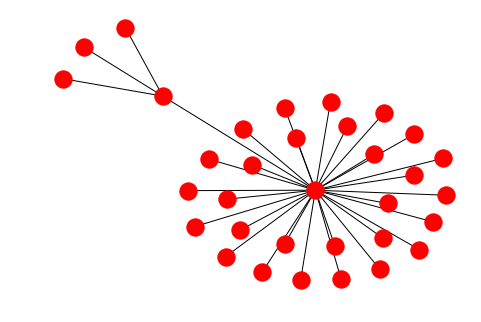

In [9]:
nx.draw(c._net)

In [10]:
c._state._open

deque(['102',
       '103',
       '104',
       '105',
       '106',
       '107',
       '108',
       '109',
       '110',
       '111',
       '112',
       '113',
       '114',
       '115',
       '116',
       '117',
       '118',
       '119',
       '120',
       '121',
       '122',
       '123',
       '124',
       '125',
       '126',
       '127',
       '128',
       '129',
       '130',
       '131',
       '132'])

In [11]:
list(c._net.nodes(data=True))[1:5]

[('101',
  {'label': '<Tooth_Fairy_(2010_film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 48000000.0,
   'budget': 112500000.0}),
 ('102',
  {'label': '<Southland_Tales>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 0,
   'gross': 17000000.0,
   'budget': 374743.0}),
 ('103',
  {'label': '<Gridiron_Gang>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 0,
   'gross': 30000000.0,
   'budget': 179480851.0}),
 ('104',
  {'label': '<San_Andreas_(film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 0,
   'gross': 110000000.0,
   'budget': 474000000.0})]

In [12]:
c._state._visited0

{'<Dwayne_Johnson>': '100',
 '<Ashley_Judd>': '130',
 '<Stephen_Merchant>': '131',
 '<Julie_Andrews>': '132'}

In [13]:
c._state._visited1

{'<Tooth_Fairy_(2010_film)>': '101',
 '<Southland_Tales>': '102',
 '<Gridiron_Gang>': '103',
 '<San_Andreas_(film)>': '104',
 '<Snitch_(film)>': '105',
 '<Empire_State_(2013_film)>': '106',
 '<Be_Cool>': '107',
 '<Planet_51>': '108',
 '<Faster_(2010_film)>': '109',
 '<Race_to_Witch_Mountain>': '110',
 '<The_Fast_and_the_Furious>': '111',
 '<Journey_2:_The_Mysterious_Island>': '112',
 '<Beyond_the_Mat>': '113',
 '<The_Mummy_Returns>': '114',
 '<The_Scorpion_King>': '115',
 '<The_Rundown>': '116',
 '<Central_Intelligence>': '117',
 '<Hercules_(2014_film)>': '118',
 '<G.I._Joe:_Retaliation>': '119',
 '<The_Game_Plan_(film)>': '120',
 '<Get_Smart_(film)>': '121',
 '<Walking_Tall_(2004_film)>': '123',
 '<G.I._Joe_(film_series)>': '124',
 '<Baywatch_(film)>': '125',
 '<Jumanji_(2017_sequel)>': '126',
 '<Bret_Hart:_Survival_of_the_Hitman>': '127',
 '<Longshot_(film)>': '128',
 '<Moana_(2016_film)>': '129'}

In [14]:
c.to_files("out.graphml", "out.json")
#len(c._net.nodes())

In [15]:
c2 = Crawler(5, api)
#c2.from_files("out.graphml", "out.json")

In [16]:
c2.from_files("out.graphml", "out.json")

In [17]:
c2.crawl_k(15)


Expanding node: 102
Expanding node: 103
Expanding node: 104
Expanding node: 105
Expanding node: 106
Expanding node: 107
Expanding node: 108
Expanding node: 109
Expanding node: 110
Expanding node: 111
Expanding node: 112
Expanding node: 113
Expanding node: 114
Expanding node: 115
Expanding node: 116


True

In [18]:
list(c2._net.nodes(data=True))

[('100',
  {'label': '<Dwayne_Johnson>',
   'bipartite': 0,
   '_depth': 0,
   '_expanded': 1,
   'gender': 'male'}),
 ('101',
  {'label': '<Tooth_Fairy_(2010_film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 48000000.0,
   'budget': 112500000.0}),
 ('102',
  {'label': '<Southland_Tales>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 17000000.0,
   'budget': 374743.0}),
 ('103',
  {'label': '<Gridiron_Gang>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 30000000.0,
   'budget': 179480851.0}),
 ('104',
  {'label': '<San_Andreas_(film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 110000000.0,
   'budget': 474000000.0}),
 ('105',
  {'label': '<Snitch_(film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 15000000.0,
   'budget': 57800000.0}),
 ('106',
  {'label': '<Empire_State_(2013_film)>',
   'bipartite': 1,
   '_depth': 1,
   '_expanded': 1,
   'gross': 11000000.0,
   'budge

In [19]:
len(c2._net.nodes())

113

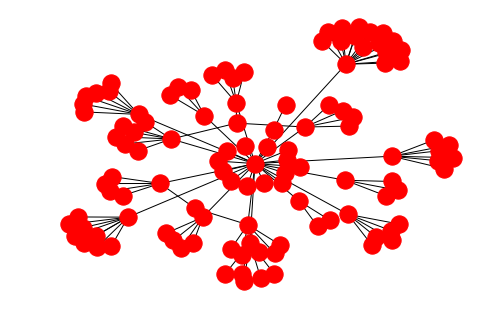

In [20]:
nx.draw(c2._net)

In [21]:
labels = [data['label'] for node, data in c2._net.nodes(data=True)]
labels

['<Dwayne_Johnson>',
 '<Tooth_Fairy_(2010_film)>',
 '<Southland_Tales>',
 '<Gridiron_Gang>',
 '<San_Andreas_(film)>',
 '<Snitch_(film)>',
 '<Empire_State_(2013_film)>',
 '<Be_Cool>',
 '<Planet_51>',
 '<Faster_(2010_film)>',
 '<Race_to_Witch_Mountain>',
 '<The_Fast_and_the_Furious>',
 '<Journey_2:_The_Mysterious_Island>',
 '<Beyond_the_Mat>',
 '<The_Mummy_Returns>',
 '<The_Scorpion_King>',
 '<The_Rundown>',
 '<Central_Intelligence>',
 '<Hercules_(2014_film)>',
 '<G.I._Joe:_Retaliation>',
 '<The_Game_Plan_(film)>',
 '<Get_Smart_(film)>',
 '<Walking_Tall_(2004_film)>',
 '<Walking_Tall_(2004_film)>',
 '<G.I._Joe_(film_series)>',
 '<Baywatch_(film)>',
 '<Jumanji_(2017_sequel)>',
 '<Bret_Hart:_Survival_of_the_Hitman>',
 '<Longshot_(film)>',
 '<Moana_(2016_film)>',
 '<Ashley_Judd>',
 '<Stephen_Merchant>',
 '<Julie_Andrews>',
 '<Wallace_Shawn>',
 '<Miranda_Richardson>',
 '<Sarah_Michelle_Gellar>',
 '<Justin_Timberlake>',
 '<Bai_Ling>',
 '<Mandy_Moore>',
 '<Seann_William_Scott>',
 '<Xzibit>',
 

In [22]:
c3 = Crawler(3, api)
c3.initialize()
c3.set_autosave(5, "save/")

In [23]:
c3.crawl_k(10)

Expanding node: 100
Expanding node: 101
Expanding node: 102
Expanding node: 103
Expanding node: 104
Autosaving...
Expanding node: 105
Expanding node: 106
Expanding node: 107
Expanding node: 108
Expanding node: 109
Autosaving...


True